In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
customers.shape

(200, 4)

In [11]:
products.shape

(100, 4)

In [12]:
transactions.shape

(1000, 7)

In [13]:
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())


Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [14]:
print("\nDuplicate Entries in Customers:", customers.duplicated().sum())
print("Duplicate Entries in Products:", products.duplicated().sum())
print("Duplicate Entries in Transactions:", transactions.duplicated().sum())


Duplicate Entries in Customers: 0
Duplicate Entries in Products: 0
Duplicate Entries in Transactions: 0


In [15]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


Customer Region Distribution:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


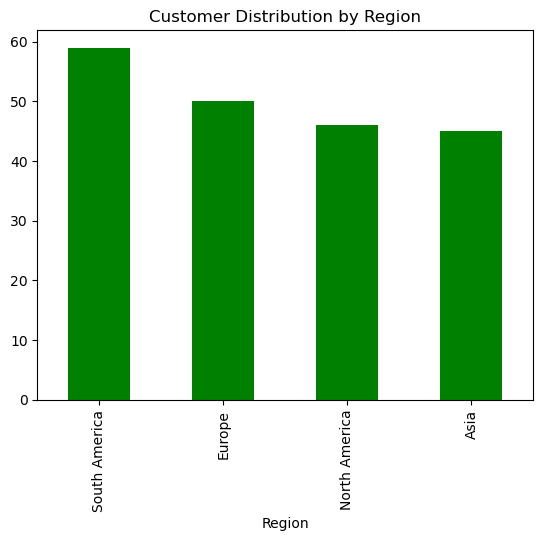

In [17]:
region_counts = customers["Region"].value_counts()
print("\nCustomer Region Distribution:\n", region_counts)
region_counts.plot(kind="bar", color="green", title="Customer Distribution by Region")
plt.show()


Product Category Distribution:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


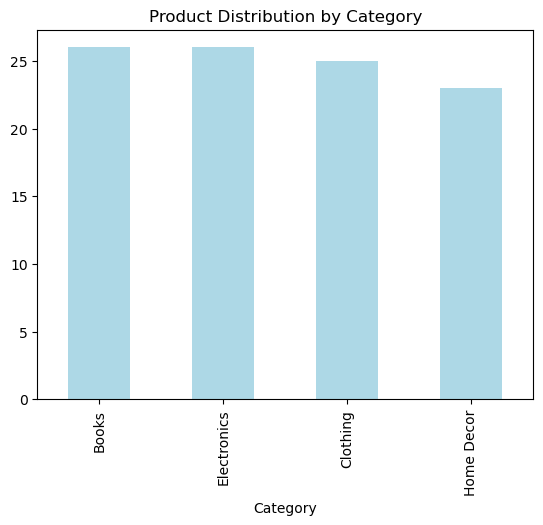

In [20]:
category_counts = products["Category"].value_counts()
print("\nProduct Category Distribution:\n", category_counts)
category_counts.plot(kind="bar", color="lightblue", title="Product Distribution by Category")
plt.show()


In [28]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
transactions_by_date = transactions.groupby(transactions["TransactionDate"].dt.date).sum()["TotalValue"]
print("\nTransactions Over Time:\n", transactions_by_date.head())
transactions_by_date.plot(title="Total Transactions Over Time", color="green")
plt.show()

TypeError: datetime64 type does not support sum operations


Transactions Over Time:
 TransactionDate
2023-12-30     313.92
2023-12-31    3455.60
2024-01-01    1468.94
2024-01-02    1818.03
2024-01-03    2224.41
Name: TotalValue, dtype: float64


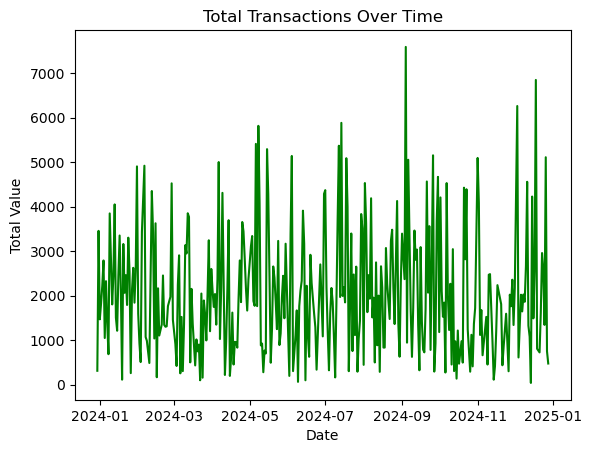

In [29]:
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Extract only the date part and group by it
transactions_by_date = transactions.groupby(transactions["TransactionDate"].dt.date)["TotalValue"].sum()

# Display and visualize the results
print("\nTransactions Over Time:\n", transactions_by_date.head())
transactions_by_date.plot(title="Total Transactions Over Time", color="green")
plt.xlabel("Date")
plt.ylabel("Total Value")
plt.show()


Top-Selling Products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


C:\Users\aqsar\AppData\Local\Temp\ipykernel_32168\4180671891.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_products.values, y=top_selling_products.index, palette="viridis")


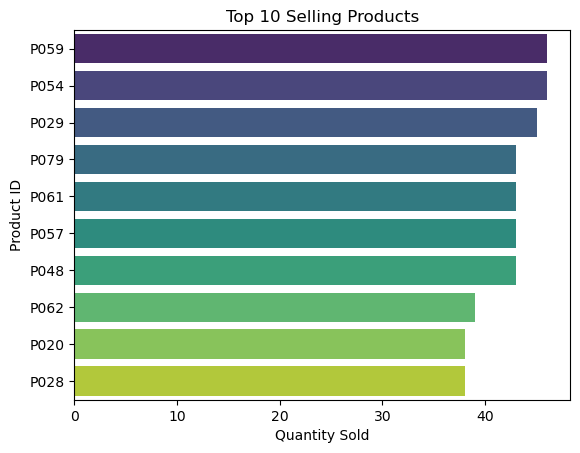

In [31]:
# Group by ProductID and sum the Quantity to find the top-selling products
top_selling_products = transactions.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(10)

# Display and visualize the results
print("\nTop-Selling Products:\n", top_selling_products)
sns.barplot(x=top_selling_products.values, y=top_selling_products.index, palette="viridis")
plt.title("Top 10 Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product ID")
plt.show()



Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


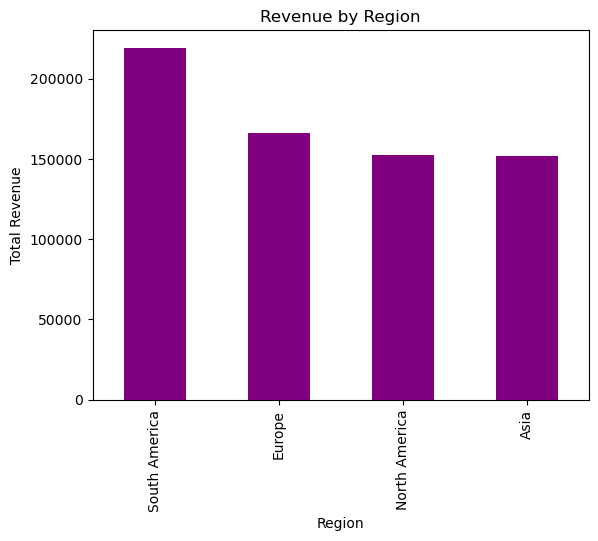

In [33]:
# Merge data to include customer region and transaction details
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Group by region and sum the 'TotalValue' to calculate revenue
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

# Display and visualize the results
print("\nRevenue by Region:\n", revenue_by_region)
revenue_by_region.plot(kind="bar", color="purple", title="Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()
